# Untersuchung des Housingdatensatzes aus Praxiseinsteig Machine Learning von Aurelion Geron

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv("Data/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
type(housing)

pandas.core.frame.DataFrame

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [9]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]
# Zuordnung einer Zahl zu einer Kategorie

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
type(housing_cat_encoded)

numpy.ndarray

In [11]:
housing_categories
# Near bay = 0, <1H OCEAN = 1, INLAND =2 etc.

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# OneHotEncoder ist dafür da, um numerisch zu sagen, ob das Merkmal Near bay ausgesprägt ist oder nicht. 
# Ausgeprägt = 1, nicht ausgeprägt = 0
# Near Bay = 0
# Near Bay ausgeprägt = 0, 1
# Near Bay nicht ausgeprägt = 0, 0

In [13]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
# .fit_transform erwartet 2D array, ist aber 1D array, daher Umformung mit reshape

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [14]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [15]:
np_housing_cat_1hot = housing_cat_1hot.toarray()
# Zuordnung der Daten zur Variable np_housing_cat_1hot

In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# neues Dataframe erstellen, in dem Attribut "Oceans Proximity" in integers umgewandelt wurde und Zugehörigkeit mittels
# OneHotEncoder binär gecodet ist
pd_housing_cat_1hot = pd.DataFrame(np_housing_cat_1hot)
# Umwandlung eines numpy array in ein DataFrame(pd)
type(pd_housing_cat_1hot)

pandas.core.frame.DataFrame

In [18]:
# Entfernen der Spalte "Ocean proximity" vom Ursprungsdatenset
housing_wo_ocean_proximity = housing.drop("ocean_proximity", axis =1)
type(housing_wo_ocean_proximity)

pandas.core.frame.DataFrame

In [19]:
# Zusammenführen der beiden DataFrames
housing_rdy_gesamt = pd.concat((housing_wo_ocean_proximity, pd_housing_cat_1hot), axis= 1)
housing_rdy_gesamt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Umbenennung der Spalten 0,1,2,3 und 4
housing_rdy_gesamt_bschr = housing_rdy_gesamt.rename(columns = {0: "near_bay", 1: "<1h ocean", 2:"inland", 3:"near ocean", 4:"island"})
housing_rdy_gesamt_bschr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0


### Erstellung verschiedener Gesamtdatensätze, um Auswirkung auf Prediction zu untersuchen

In [32]:
# Entfernung der Daten, dessen Häuser älter als 51 Jahre sind
housing_rdy_gesamt_young = housing_rdy_gesamt_bschr.drop(housing_rdy_gesamt_bschr[housing_rdy_gesamt_bschr["housing_median_age"] > 51].index)


In [33]:
# Aufteilung der Daten in Trainingsdaten und Testdaten
train_set, test_set = train_test_split(housing_rdy_gesamt_bschr, test_size=0.2, random_state =(1))

In [34]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,1.0,0.0,0.0,0.0,0.0
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,1.0,0.0,0.0,0.0,0.0
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,0.0,0.0,1.0,0.0,0.0
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,0.0,1.0,0.0,0.0,0.0
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,0.0,1.0,0.0,0.0,0.0


In [35]:
train_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
median_house_value      0
near_bay                0
<1h ocean               0
inland                  0
near ocean              0
island                  0
dtype: int64

In [36]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,0.0,1.0,0.0,0.0,0.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0.0,0.0,1.0,0.0,0.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,1.0,0.0,0.0,0.0,0.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,1.0,0.0,0.0,0.0,0.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,0.0,1.0,0.0,0.0,0.0


In [37]:
test_set.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        44
population             0
households             0
median_income          0
median_house_value     0
near_bay               0
<1h ocean              0
inland                 0
near ocean             0
island                 0
dtype: int64

In [38]:
from sklearn.preprocessing import Imputer
# um fehlende Werte aufzufüllen
imputer = Imputer(strategy = "median")
# Mediane werden berechnet und durch NaN ersetzt, wenn Funktion weiter unten benutzt werden

In [39]:
imputer.fit(train_set)
# berechnet die Mediane für jede Spalte/Attribut

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [40]:
imputer.statistics_
# Ausgabe der Mediane für train_set

array([-1.18490e+02,  3.42600e+01,  2.90000e+01,  2.12700e+03,
        4.35000e+02,  1.16400e+03,  4.10000e+02,  3.54455e+00,
        1.80600e+05,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00])

In [41]:
train_set.median().values
# hiermit wird überprüft, ob die oben berechneten Mediane diese tatsächlich sind, wenn die gleichen Werte auftauchen

array([-1.18490e+02,  3.42600e+01,  2.90000e+01,  2.12700e+03,
        4.35000e+02,  1.16400e+03,  4.10000e+02,  3.54455e+00,
        1.80600e+05,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00])

In [42]:
X = imputer.transform(train_set)
# NaN werden entfernt und durch die Medianwerte ersetzt

In [43]:
train_set_imputed = pd.DataFrame(X, columns = train_set.columns)
# housing_tr ist der neue DataFrame, der Medianwerte statt NaN in den entsprechenden Zellen besitzt
# Erstellung DatamFrame basierend auf Daten von X, Spalten soll er so benennen wie in train_set
# .columns muss dran

In [44]:
Y = imputer.transform(test_set)
test_set_imputed = pd.DataFrame(Y, columns = test_set.columns)

# Beschreibung der Traindaten

In [45]:
train_set_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
near_bay              16512 non-null float64
<1h ocean             16512 non-null float64
inland                16512 non-null float64
near ocean            16512 non-null float64
island                16512 non-null float64
dtypes: float64(14)
memory usage: 1.8 MB


In [46]:
train_set_imputed.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574288,35.632194,28.604469,2639.590661,538.022408,1425.257146,500.593508,3.876149,207735.064196,0.111252,0.444586,0.314499,0.129360,0.000303
std,2.007578,2.137087,12.586046,2176.421777,418.937307,1123.756792,382.439609,1.891584,115594.530574,0.314454,0.496935,0.464330,0.335609,0.017399
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.810000,33.930000,18.000000,1451.000000,297.000000,786.000000,279.000000,2.572050,120600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1164.000000,410.000000,3.544550,180600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3149.000000,644.250000,1723.000000,605.250000,4.750000,266000.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


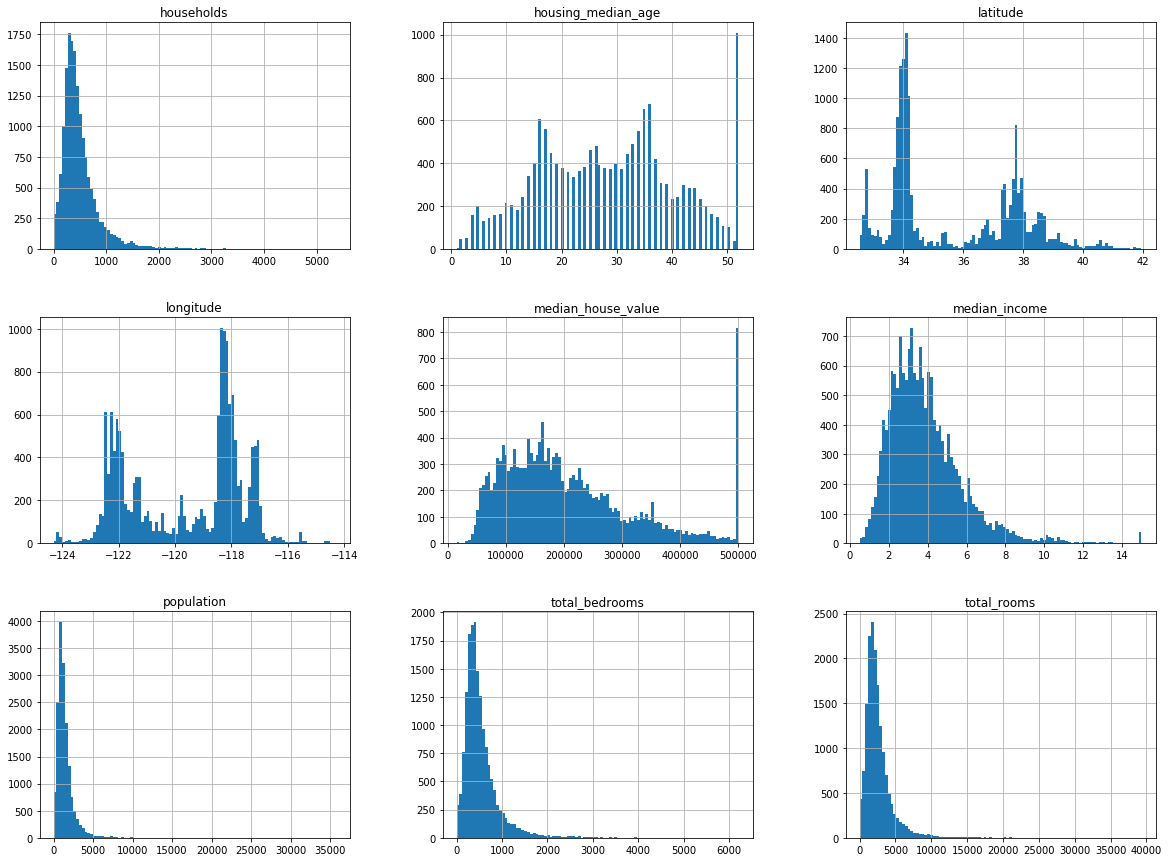

In [47]:
train_set_imputed.iloc[:,:-5].hist(bins=100, figsize=(20,15))
plt.show()

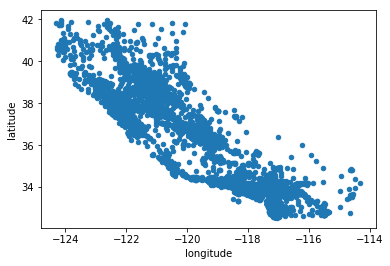

In [48]:
train_set_imputed.plot(kind="scatter", x = "longitude", y ="latitude")


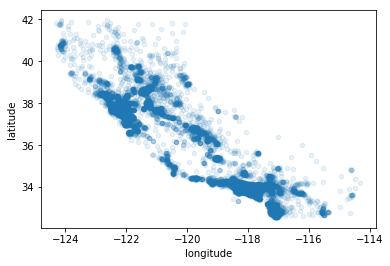

In [49]:
train_set_imputed.plot(kind="scatter", x = "longitude", y ="latitude", alpha = 0.1)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d461009ef0>,
 <matplotlib.legend.Legend at 0x1d461001b38>)

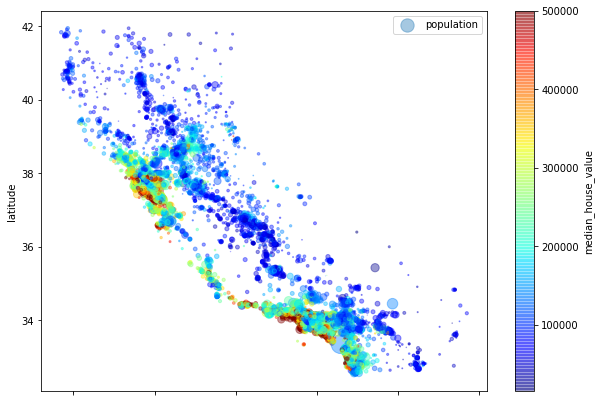

In [50]:
train_set_imputed.plot(kind="scatter", x = "longitude", y ="latitude", alpha = 0.4, s = train_set_imputed["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True), plt.legend()


In [51]:
corr_matrix = train_set_imputed.corr()

In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
<1h ocean             0.253759
near_bay              0.162501
near ocean            0.142375
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050251
island                0.026003
population           -0.023884
longitude            -0.050893
latitude             -0.139374
inland               -0.485507
Name: median_house_value, dtype: float64

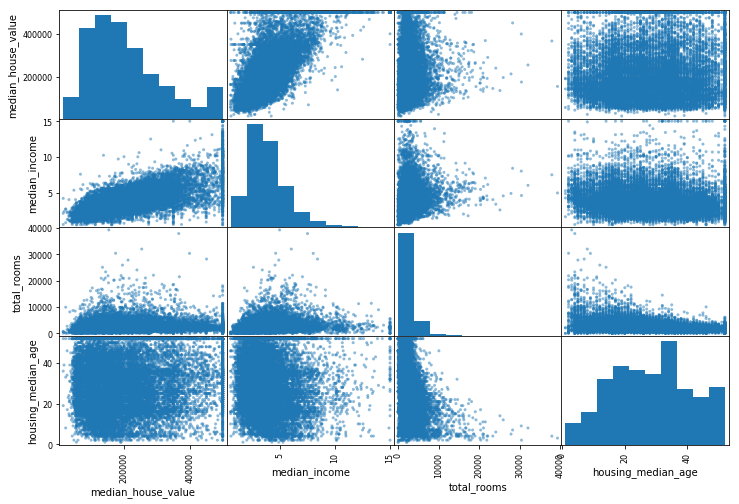

In [53]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(train_set_imputed[attributes], figsize=(12,8))
plt.show()

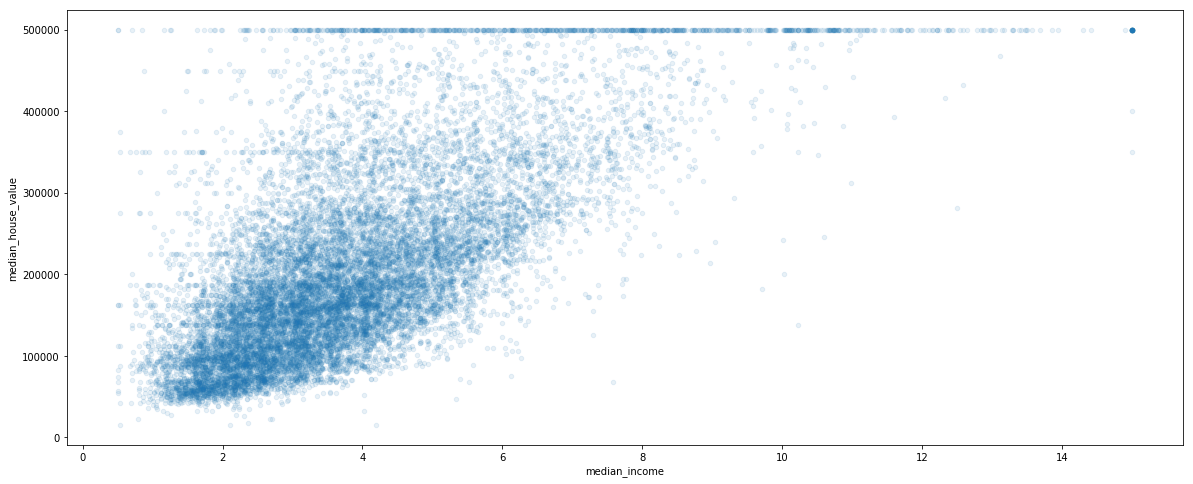

In [54]:
train_set_imputed.plot(kind="scatter", x = "median_income",y = "median_house_value", alpha = 0.1, figsize=(20,8))
plt.show()

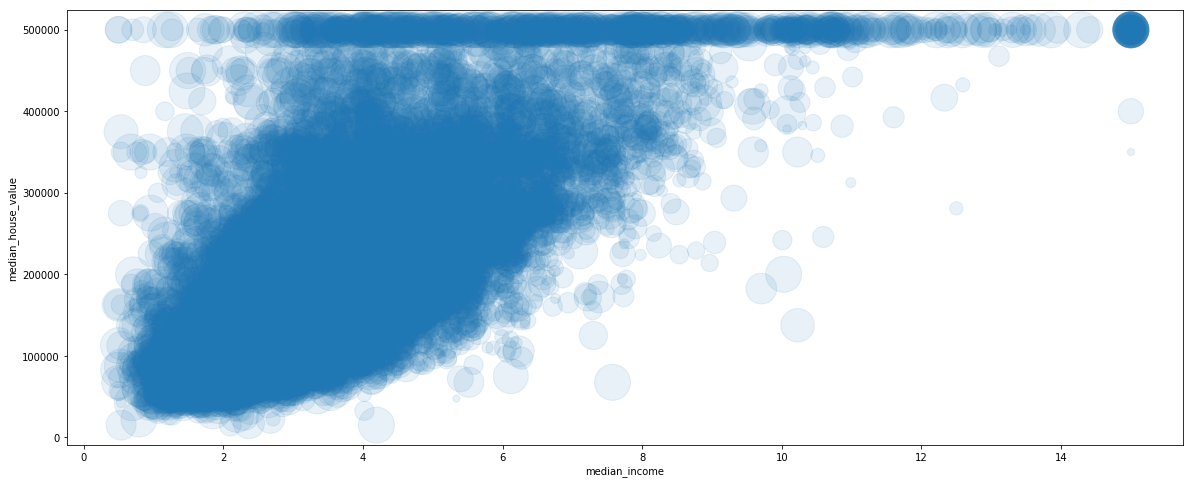

In [55]:
train_set_imputed.plot(kind="scatter", x = "median_income",y = "median_house_value", alpha = 0.1, s = train_set_imputed["housing_median_age"]*25, figsize=(20,8)), 
plt.show()

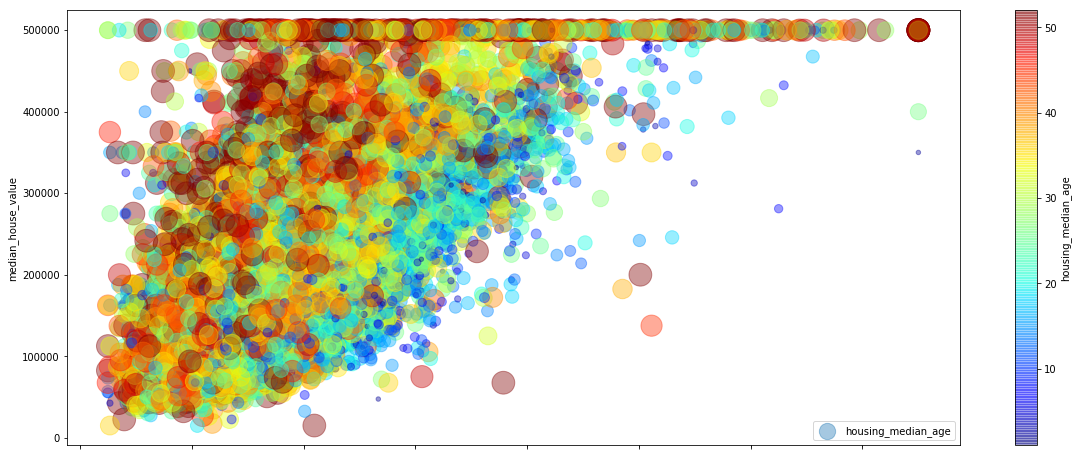

In [56]:
train_set_imputed.plot(kind="scatter", x = "median_income",y = "median_house_value", alpha = 0.4, s = train_set_imputed["housing_median_age"]*10, figsize=(20,8),label="housing_median_age", c = "housing_median_age",cmap=plt.get_cmap("jet"), colorbar = True), plt.legend()
plt.show()

# Vorbereitung der Daten für Machine Learning

In [57]:
# Verwendung von Standardisierung
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(copy=True, with_mean = True, with_std = True)

In [58]:
# Standardisierung des Datensatzes, nur Berechnung
std_scaler.fit(train_set_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
# Ausgabe der berechneten Daten (.transform) 
train_set_imputed_std_scale = std_scaler.transform(train_set_imputed)

In [60]:
train_set_imputed_std_scale = pd.DataFrame(train_set_imputed_std_scale, columns=train_set_imputed.columns)
train_set_imputed_std_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
0,-1.422509,0.972290,1.858903,-0.564977,-0.601594,-0.486114,-0.571594,-0.362326,0.414089,2.826406,-0.894683,-0.677338,-0.385462,-0.017404
1,-1.382659,1.084596,1.064348,-0.530516,-0.592045,-0.404243,-0.516682,-0.141023,-0.805729,2.826406,-0.894683,-0.677338,-0.385462,-0.017404
2,-0.829737,1.061199,-1.001494,-1.189875,-1.260423,-1.250537,-1.293298,-0.661450,-0.607617,-0.353806,-0.894683,1.476369,-0.385462,-0.017404
3,0.609852,-0.754411,0.428704,1.184737,2.477719,1.880128,2.276001,-1.248647,-0.769394,-0.353806,1.117714,-0.677338,-0.385462,-0.017404
4,0.589927,-0.815243,0.746526,-0.362345,-0.491789,-0.600911,-0.487918,1.828920,1.859703,-0.353806,1.117714,-0.677338,-0.385462,-0.017404


In [61]:
x = train_set_imputed_std_scale.drop("median_house_value", axis=1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,<1h ocean,inland,near ocean,island
0,-1.422509,0.972290,1.858903,-0.564977,-0.601594,-0.486114,-0.571594,-0.362326,2.826406,-0.894683,-0.677338,-0.385462,-0.017404
1,-1.382659,1.084596,1.064348,-0.530516,-0.592045,-0.404243,-0.516682,-0.141023,2.826406,-0.894683,-0.677338,-0.385462,-0.017404
2,-0.829737,1.061199,-1.001494,-1.189875,-1.260423,-1.250537,-1.293298,-0.661450,-0.353806,-0.894683,1.476369,-0.385462,-0.017404
3,0.609852,-0.754411,0.428704,1.184737,2.477719,1.880128,2.276001,-1.248647,-0.353806,1.117714,-0.677338,-0.385462,-0.017404
4,0.589927,-0.815243,0.746526,-0.362345,-0.491789,-0.600911,-0.487918,1.828920,-0.353806,1.117714,-0.677338,-0.385462,-0.017404


In [62]:
y_true = train_set_imputed_std_scale["median_house_value"]

In [63]:
lin_reg = LinearRegression()

In [64]:
lin_reg.fit(x,y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
lin_reg.predict(x)

array([ 0.20456223,  0.16550422, -0.96334054, ..., -0.65627864,
       -0.99784828, -0.20353211])

In [66]:
y_predict = lin_reg.predict(x)

In [67]:
mse = mean_squared_error(y_true, y_predict)
lin_rmse = np.sqrt(mse)

In [68]:
lin_rmse

0.5940341399251249

In [69]:
mse

0.35287655939658286

In [70]:
r2_train = r2_score(y_true, y_predict)
r2_train

0.6471234406034172

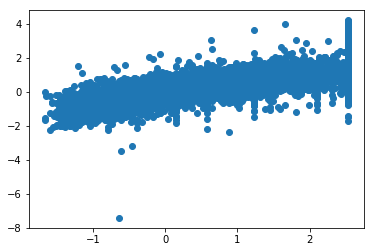

In [71]:
plt.scatter(y_true, y_predict)
plt.show()

## Predicten und Fehlerberechnung für Testdatensatz

In [72]:
std_scaler.fit(test_set_imputed)
test_set_imputed_std_scale = std_scaler.transform(test_set_imputed)
test_set_imputed_std_scale = pd.DataFrame(test_set_imputed_std_scale, columns=test_set_imputed.columns)
test_set_imputed_std_scale.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_bay,<1h ocean,inland,near ocean,island
0,0.599533,-0.736853,0.812266,0.086072,0.327409,-0.272027,0.336970,-0.309873,1.324215,-0.351092,1.140053,-0.700180,-0.380472,0.0
1,-0.115054,0.539300,0.653317,-0.197735,-0.183072,-0.242883,-0.150118,-0.967961,-1.158124,-0.351092,-0.877152,1.428203,-0.380472,0.0
2,-1.443583,0.985014,1.368589,-0.363933,-0.287542,0.092270,-0.233919,0.085103,0.227551,2.848260,-0.877152,-0.700180,-0.380472,0.0
3,-1.373130,1.022548,1.845437,-1.035534,-1.033081,-1.051193,-1.069301,-1.204782,-0.793151,2.848260,-0.877152,-0.700180,-0.380472,0.0
4,0.715276,-0.849454,0.653317,-0.495165,-0.574836,-0.613180,-0.556025,0.688695,0.192625,-0.351092,1.140053,-0.700180,-0.380472,0.0


In [73]:
x_test = test_set_imputed_std_scale.drop("median_house_value", axis=1)


In [74]:
y_true_test = test_set_imputed_std_scale["median_house_value"]

In [75]:
lin_reg.predict(x_test)

array([ 0.33337599, -0.95153917,  0.37507404, ...,  0.67287121,
        0.5153493 , -0.58373921])

In [76]:
y_predict_test = lin_reg.predict(x_test)

In [77]:
mse_test = mean_squared_error(y_true_test, y_predict_test)
lin_rmse_test = np.sqrt(mse_test)

In [78]:
mse_test

0.3612620425277168

In [79]:
lin_rmse_test

0.6010507819874431

In [80]:
r2_test = r2_score(y_true_test, y_predict_test)
r2_test

0.6387379574722832

In [81]:
mse < mse_test

True

In [82]:
lin_rmse < lin_rmse_test

True

In [83]:
r2_train < r2_test

False

# mit Funktion

In [84]:
train_set_imputed_target = train_set_imputed["median_house_value"]
test_set_imputed_target = test_set_imputed["median_house_value"]

# Definition einer Funktion, um:
# 1. Lineare Regression.fit(), Lineare Regression.predict()
# 2.Berechnung von mse, rmse und R2
# in einer Funktion automatisch auszuführen

# leere Listen erstellen, in der die Daten gespeichert werden
Name = []
MSE = []
RMSE = []
R2_Score = []

# Definition der Funktion für lineare Regression
def Lin_Reg(name, train_set,train_label, test_set, test_label):
    # train_set = skalierte Daten
    # train_label = nur median_house_value Daten, aber nicht skaliert
    # test_set = skalierte Testdaten
    # test_label = nur median_house_value Daten, aber nicht skaliert
    
    Name.append(name)
    x = train_set.drop("median_house_value", axis=1)
    
  
    lin_reg = LinearRegression()
    lin_reg.fit(x,train_label) 
    # Für richtige Angabe der Fehler, x = skalierte Daten, train_label = NICHT-skalierte Daten nur
    # "median_house_value"
    
    x_test = test_set.drop("median_house_value", axis = 1)
    # Speicherung der predicten Werte in einer Variable
    y_predict = lin_reg.predict(x_test)
    
    # Berechnung von MSE, RMSE und R2 mit NICHT-skalierten Daten
    mse = mean_squared_error(test_label, y_predict)
    MSE.append(mse)
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    r2 = r2_score(test_label, y_predict)
    R2_Score.append(r2)
    
    # Darstellung in einem Scatter Plot
    plt.scatter(test_label, y_predict)
    plt.xlabel("median house value")
    plt.ylabel("predicted median house value")
    
    return plt.show(), print("MSE: " + str(mse) + " RMSE: " + str(rmse) + " R2: "+ str(r2))

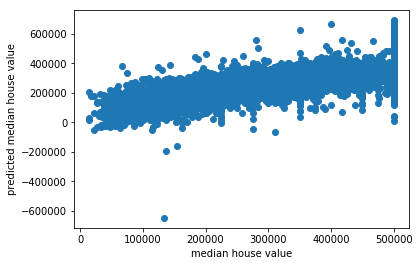

MSE: 4714884725.657155 RMSE: 68665.01820910817 R2: 0.6471234406034171


(None, None)

In [85]:
Lin_Reg("Train on Train", train_set_imputed_std_scale, train_set_imputed_target, train_set_imputed_std_scale, train_set_imputed_target)

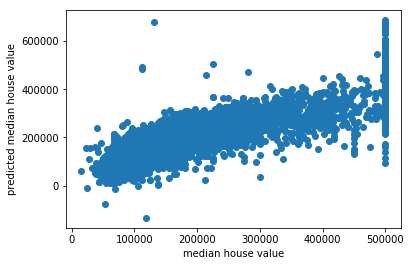

MSE: 4760318060.951907 RMSE: 68995.05823573096 R2: 0.6370853631923157


(None, None)

In [86]:
Lin_Reg("Test on Train", train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target)

# Prediction of median house value with K-nearest Regressor

In [87]:
# leere Listen erstellen, in der die Daten gespeichert werden

# Definition der Funktion für lineare Regression
def KNR(name, train_set,train_label, test_set, test_label, k, weight, algo):
    # train_set = skalierte Daten
    # train_label = nur median_house_value Daten, aber nicht skaliert
    # test_set = skalierte Testdaten
    # test_label = nur median_house_value Daten, aber nicht skaliert
    
    Name.append(name)
    x = train_set.drop("median_house_value", axis=1)
    
    # Fitten der Daten mittels K-nearest Regressor
    knr = KNeighborsRegressor(n_neighbors= k, weights = weight, algorithm = algo)
    knr.fit(x,train_label) 
    # Für richtige Angabe der Fehler, x = skalierte Daten, train_label = NICHT-skalierte Daten nur
    # "median_house_value"
    
    x_test = test_set.drop("median_house_value", axis = 1)
    # Speicherung der predicten Werte in einer Variable
    y_predict = knr.predict(x_test)
    
    # Berechnung von MSE, RMSE und R2 mit NICHT-skalierten Daten
    mse = mean_squared_error(test_label, y_predict)
    MSE.append(mse)
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    r2 = r2_score(test_label, y_predict)
    R2_Score.append(r2)
    
    # Darstellung in einem Scatter Plot
    plt.scatter(test_label, y_predict)
    plt.xlabel("median house value")
    plt.ylabel("predicted median house value")
    plt.title("KNR, "+ " k: " + str(k))
    
    return plt.show(), print("MSE: " + str(mse) + " RMSE: " + str(rmse) + " R2: "+ str(r2))

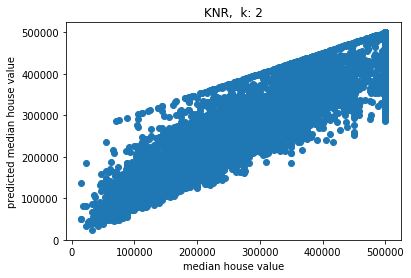

MSE: 1404525262.2287276 RMSE: 37476.9964408666 R2: 0.8948809841683293


(None, None)

In [88]:
KNR("Train on Train, k = 2", train_set_imputed_std_scale, train_set_imputed_target, train_set_imputed_std_scale, train_set_imputed_target, 2, "uniform", "brute")

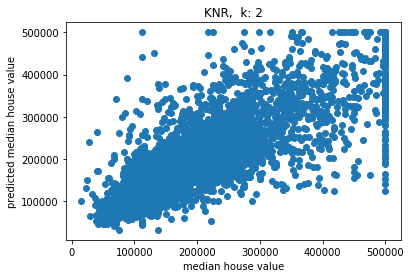

MSE: 4181127030.942769 RMSE: 64661.63492321215 R2: 0.6812414257928896


(None, None)

In [89]:
KNR("Test on Train, k = 2", train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target, 2, "uniform", "brute")

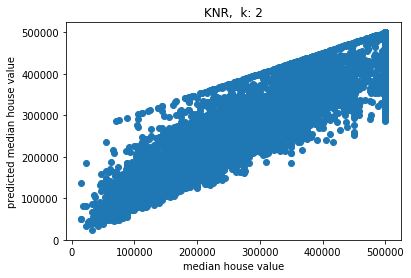

MSE: 1404525262.2287276 RMSE: 37476.9964408666 R2: 0.8948809841683293


(None, None)

In [90]:
KNR("Train on Train, k = 10", train_set_imputed_std_scale, train_set_imputed_target, train_set_imputed_std_scale, train_set_imputed_target, 2, "uniform", "brute")

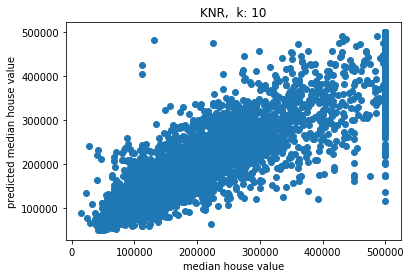

MSE: 3473671119.268474 RMSE: 58937.858115717725 R2: 0.7351760793087483


(None, None)

In [91]:
KNR("Testdaten, k=10", train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target, 10, "uniform", "brute")

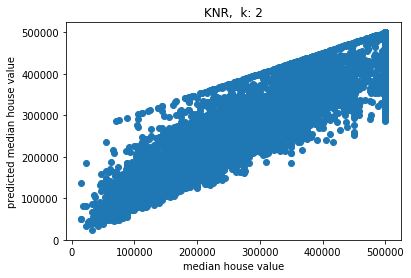

MSE: 1404525262.2287276 RMSE: 37476.9964408666 R2: 0.8948809841683293


(None, None)

In [92]:
KNR("Train on Train, k = 25", train_set_imputed_std_scale, train_set_imputed_target, train_set_imputed_std_scale, train_set_imputed_target, 2, "uniform", "brute")

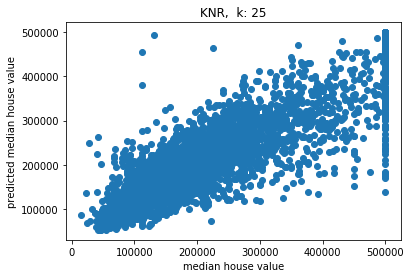

MSE: 3610685510.4406557 RMSE: 60088.97994175518 R2: 0.7247304478671099


(None, None)

In [93]:
KNR("Testdaten, k =25", train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target, 25, "uniform", "brute")

In [94]:
KNR("Train on Train, k = 50", train_set_imputed_std_scale, train_set_imputed_target, train_set_imputed_std_scale, train_set_imputed_target, 2, "uniform", "brute")

KeyboardInterrupt: 

In [ ]:
KNR("Testdaten, k =50", train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target, 50, "uniform", "brute")

In [ ]:
summary_linreg_knr = pd.DataFrame()
summary_linreg_knr["Name"] = Name
summary_linreg_knr["MSE"] = MSE
summary_linreg_knr["RMSE"] = RMSE
summary_linreg_knr["R2_Score"] = R2_Score
summary_linreg_knr

In [ ]:
for k in range(11,15):
    KNR("Test on Train, k: " + str(k), train_set_imputed_std_scale, train_set_imputed_target, test_set_imputed_std_scale, test_set_imputed_target, k, "uniform", "brute")

In [ ]:
summary_linreg_knr = pd.DataFrame()
summary_linreg_knr["Name"] = Name
summary_linreg_knr["MSE"] = MSE
summary_linreg_knr["RMSE"] = RMSE
summary_linreg_knr["R2_Score"] = R2_Score
summary_linreg_knr